In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas 
from geodatasets import get_path
import folium
from folium.plugins import HeatMap


In [3]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\Project Cognifyz\Dataset .csv')

# Top Cuisines


#### Determine the top three most common cuisines in the dataset

In [4]:
df.shape
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [6]:
Cuisines_count = df['Cuisines'].str.split(',').explode('Cuisines').value_counts()
Cuisines_count
top_Cuisines=Cuisines_count.head(3)
top_Cuisines,"The Top 3 Cuisines are : "

(Cuisines
 North Indian    2992
  Chinese        1880
  Fast Food      1314
 Name: count, dtype: int64,
 'The Top 3 Cuisines are : ')

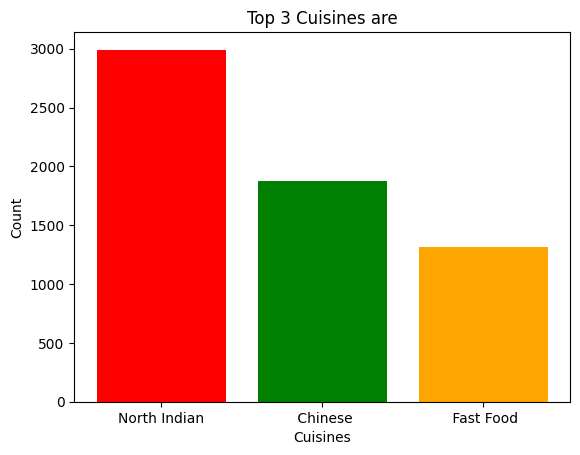

In [7]:
colours = ['red', 'green', 'orange']
plt.bar(top_Cuisines.index, top_Cuisines.values, color=colours)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top 3 Cuisines are')
plt.show()

#### Calculate the percentage of restaurants that serve each of the top cuisines.

In [8]:
total_restaurants = len(df)
total_restaurants 
top_Cuisines10= Cuisines_count.head()
percentage = (top_Cuisines10 / total_restaurants) *100
percentage

Cuisines
North Indian     31.326563
 Chinese         19.683803
 Fast Food       13.757722
 North Indian    10.135064
Chinese           8.951942
Name: count, dtype: float64

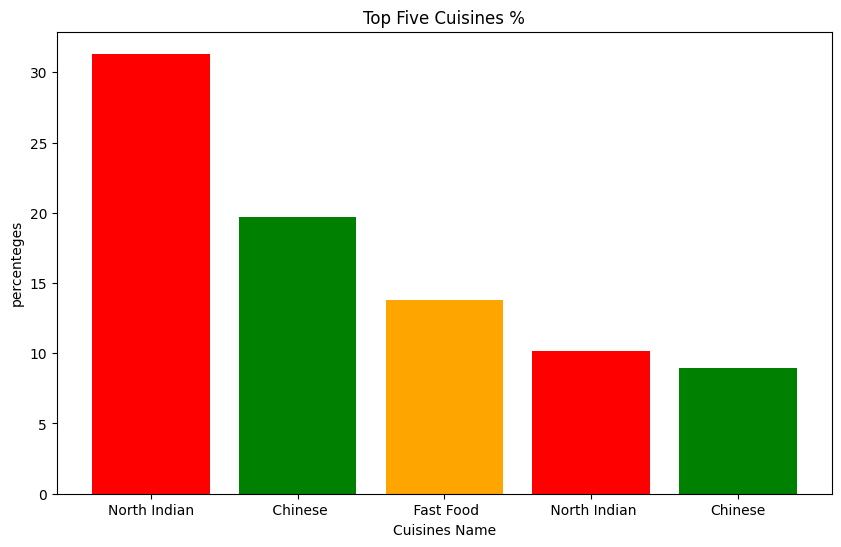

In [9]:
plt.figure(figsize=(10,6))
plt.bar(top_Cuisines10.index, percentage.values, color=colours)
plt.xlabel('Cuisines Name')
plt.ylabel('percenteges')
plt.title('Top Five Cuisines %')
plt.show()

# City Analysis

####  Identify the city with the highest number of restaurants in the dataset.

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
City_count = df['City'].value_counts()
restaurants_no = City_count.head(1)
print("City with the highest number of restaurants : ", City_count.idxmax())
restaurants_no

City with the highest number of restaurants :  New Delhi


City
New Delhi    5473
Name: count, dtype: int64

#### Calculate the average rating for restaurants in each city

In [12]:
rating_by_each_city= df.groupby('City')['Aggregate rating'].mean()
rating_by_each_city

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

####  Determine the city with the highest average rating

In [13]:
top_rated_City=rating_by_each_city.idxmax()
value=rating_by_each_city.max()
top_rated_City, value

('Inner City', np.float64(4.9))

# Price Range Distribution

#### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants

In [14]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

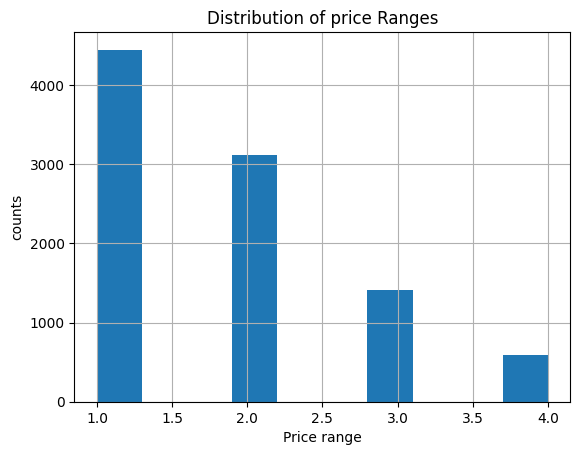

In [15]:
df.hist(column="Price range")
plt.title('Distribution of price Ranges')
plt.xlabel('Price range')
plt.ylabel('counts')
plt.show()

#### Calculate the percentage of restaurants in each price range category

In [16]:
Price_range_Count=df["Price range"].value_counts()
total_restaurant=len(df)
percentage = round((Price_range_Count/total_restaurant)* 100,2)
percentage_m = pd.merge(Price_range_Count, percentage,on="Price range")
print("The % of Restaurants in each Price Range Category are : ")
percentage_m

The % of Restaurants in each Price Range Category are : 


,count_x,count_y
Price range,,
1,4444,46.53
2,3113,32.59
3,1408,14.74
4,586,6.14


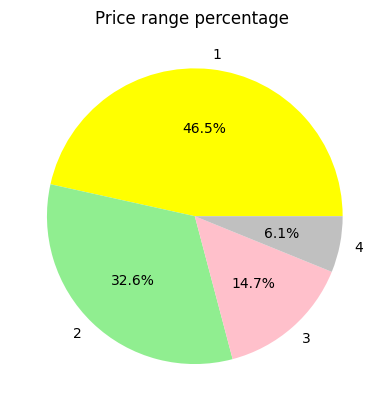

In [17]:
plt.pie(percentage,labels=percentage.index,autopct='%1.1f%%',colors=["yellow","lightgreen","pink","silver"])
plt.title("Price range percentage ")
plt.show()

# Online Delivery

 #### Determine the percentage of restaurants that offer online delivery

df.columns

In [18]:
online_delivery = df['Has Online delivery'].value_counts().get('Yes',0)
print("Total Resturent with online Delivery : ",online_delivery)

Total Resturent with online Delivery :  2451


In [19]:
no = df ['Has Online delivery'].value_counts().get('No',0)
print("Resturent with no Online Delivery : ", no)

Resturent with no Online Delivery :  7100


In [20]:
Row_count = len (df)
percentage_of_online_delivery = round((online_delivery/Row_count)*100,2)
print("Total % od Online Delivery :",percentage_of_online_delivery)

Total % od Online Delivery : 25.66


In [21]:
percentage_of_online_delivery =round((no/Row_count)*100,2)
print("Total % where Online Delivey is not present: ",percentage_of_online_delivery)

Total % where Online Delivey is not present:  74.34


#### Compare the average ratings of restaurants with and without online delivery

In [22]:
Avg_rating_yes = round(df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(),2)
print("Average Rating With online Delivery : ",Avg_rating_yes)

Average Rating With online Delivery :  3.25


In [23]:
Avg_rating_No = round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(),2)
print("Average Rating Without online Delivery : ",Avg_rating_No)

Average Rating Without online Delivery :  2.47


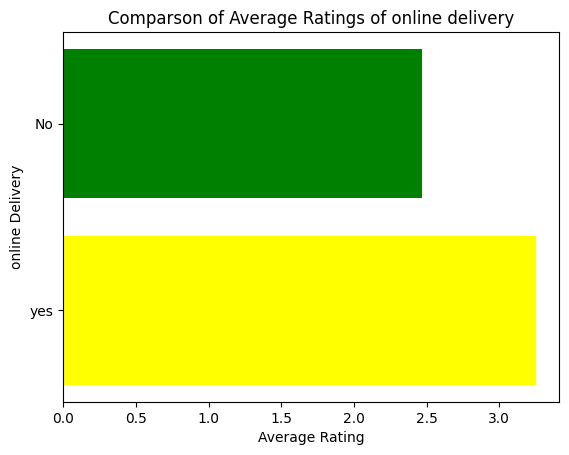

In [24]:
labels = ['yes', 'No']
average_rating = [Avg_rating_yes, Avg_rating_No]
colors = 'yellow', 'green'
plt.barh(labels, average_rating, color= colors)
plt.ylabel('online Delivery')
plt.xlabel('Average Rating')
plt.title('Comparson of Average Ratings of online delivery')
plt.show()

# Restaurant Ratings

####  Analyze the distribution of aggregate ratings and determine the most common rating range

In [25]:
agg_rating_distribution= df['Aggregate rating'].value_counts()
agg_rating_distribution

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [26]:
a = agg_rating_distribution.idxmax()
print("Most Common rating range is : " ,a)

Most Common rating range is :  0.0


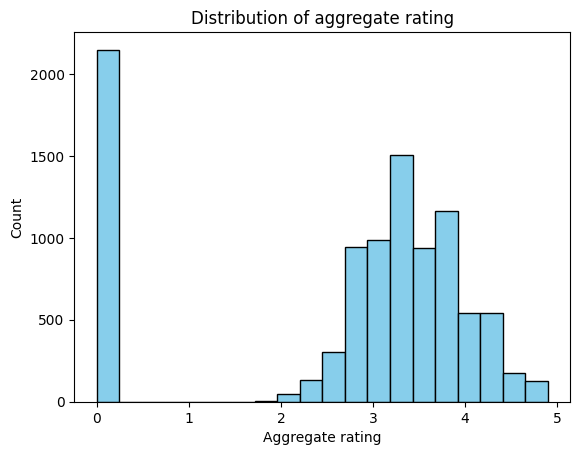

In [27]:
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='#000000')
plt.xlabel("Aggregate rating")
plt.ylabel("Count")
plt.title("Distribution of aggregate rating")
plt.show()

####  Calculate the average number of votes received by restaurants.

In [28]:
avg_vote = round(df['Votes'].mean(),3)
print("The average number of votes received by restaurantsavg_vote : ",avg_vote) 

The average number of votes received by restaurantsavg_vote :  156.91


 # Cuisine Combination
 #### Identify the most common combinations of cuisines in the dataset

In [29]:
common_combinations = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top10=common_combinations.head(10)
print("Top 10 most common combinations are : ",top10)

Top 10 most common combinations are :  Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern           4.9
European, German                   4.9
Hawaiian, Seafood                  4.9
Sunda, Indonesian                  4.9
Name: Aggregate rating, dtype: float64


#### Calculate the percentage of restaurants that serve each of the top cuisines.


In [30]:
max_rating = common_combinations.iloc[0]
print("The Max Rating is : ", max_rating)

The Max Rating is :  4.9


In [31]:
max_rated_rest = df.loc[df['Aggregate rating'] == max_rating]
print("Restaurant having the maximun rating : ", max_rated_rest['Restaurant Name'])

Restaurant having the maximun rating :  3                                           Ooma
8       Spiral - Sofitel Philippine Plaza Manila
10                              Silantro Fil-Mex
39                                    Coco Bambu
48                            Braseiro da G��vea
                          ...                   
9484              Restaurant Mosaic @ The Orient
9514                            Ministry of Crab
9524                                Gaga Manjero
9538                                   Starbucks
9540                            Draft Gastro Pub
Name: Restaurant Name, Length: 61, dtype: object


# Geographic Analysis
#### Plot the locations of restaurants on a map using longitude and latitude coordinates

In [32]:
df[["Longitude", "Latitude"]]

,Longitude,Latitude
0,121.027535,14.565443
1,121.014101,14.553708
2,121.056831,14.581404
3,121.056475,14.585318
4,121.057508,14.584450
...,...,...
9546,28.977392,41.022793
9547,29.041297,41.009847
9548,29.034640,41.055817
9549,29.036019,41.057979


In [33]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)


In [34]:
gdf.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,geometry
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,POINT (121.02754 14.56544)
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,POINT (121.0141 14.55371)
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,POINT (121.05683 14.5814)
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,POINT (121.05648 14.58532)
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,POINT (121.05751 14.58445)


<Axes: >

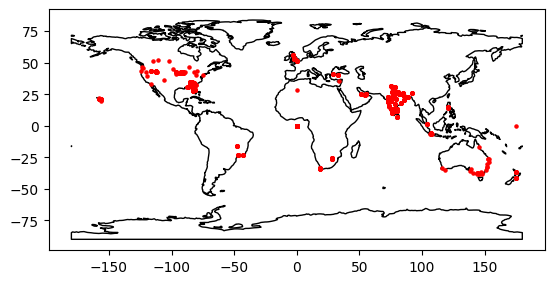

In [35]:
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(color = 'White' , edgecolor= 'black')
gdf.plot(ax=ax, marker='o',color='red' , markersize=5)

####  Identify any patterns or clusters of restaurants in specific areas

In [36]:
world_map = folium.Map(location=[df['Latitude'].mean(),df['Longitude'].mean()],zoom_start=1, height = '100%', width= '100%')

In [37]:
heat_marker = [[row['Latitude'], row['Longitude']] for i, row in df.iterrows()]
HeatMap(heat_marker, radius=10).add_to(world_map)

In [38]:
world_map

# Restaurant Chains
#### Identify if there are any restaurant chains present in the dataset

In [39]:
restaurant_chain = df.groupby("Restaurant Name").size().reset_index(name="OutletCount")
new = restaurant_chain[restaurant_chain["OutletCount"] > 1 ]
restaurant_chain = new.sort_values(by="OutletCount", ascending=False)

In [40]:
print(restaurant_chain[["Restaurant Name", "OutletCount"]].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


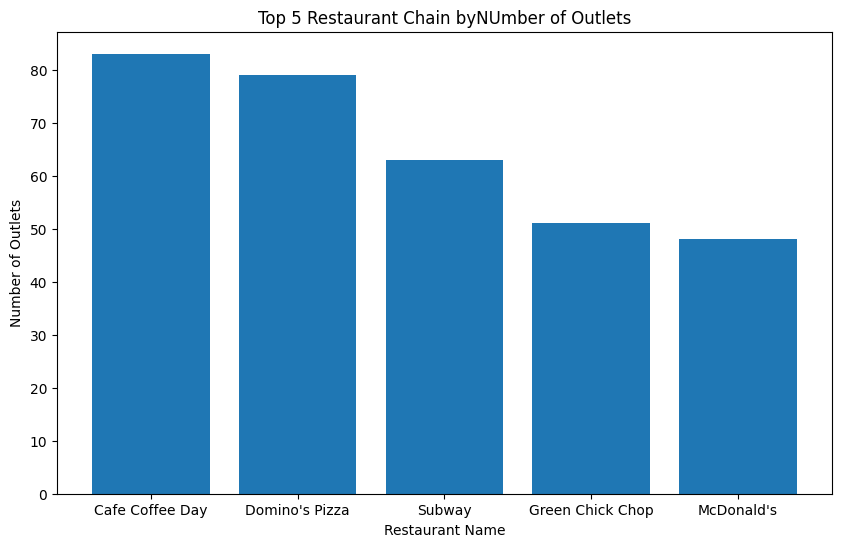

In [41]:
plt.figure(figsize=(10,6))
plt.bar(restaurant_chain["Restaurant Name"][:5], restaurant_chain["OutletCount"][:5])
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Outlets")
plt.title("Top 5 Restaurant Chain byNUmber of Outlets")
plt.show()

####  Analyze the ratings and popularity of different restaurant chains

In [42]:
rating = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating").sort_values(by="Average Rating", ascending = False)
rating

,Restaurant Name,Average Rating
5946,Solita,4.9
6045,Spiral - Sofitel Philippine Plaza Manila,4.9
2354,Flat Iron,4.9
5477,Sagar Gaire Fast Food,4.9
651,Bao,4.9
...,...,...
5099,Punjabi Special,0.0
7391,Zaika Muradabadi,0.0
5097,Punjabi Shahi Chicken Soup,0.0
7388,Zaika Kathi Roll,0.0


In [43]:
votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name="Total Votes").sort_values(by= "Total Votes", ascending= False)
votes

,Restaurant Name,Total Votes
663,Barbeque Nation,28142
101,AB's - Absolute Barbecues,13400
6943,Toit,10934
785,Big Chill,10853
2297,Farzi Cafe,10098
...,...,...
2525,Frugurpop- ibis New Delhi,0
2522,Frozen Grillz,0
953,Break Fast Junction,0
4959,Pizza Hot,0


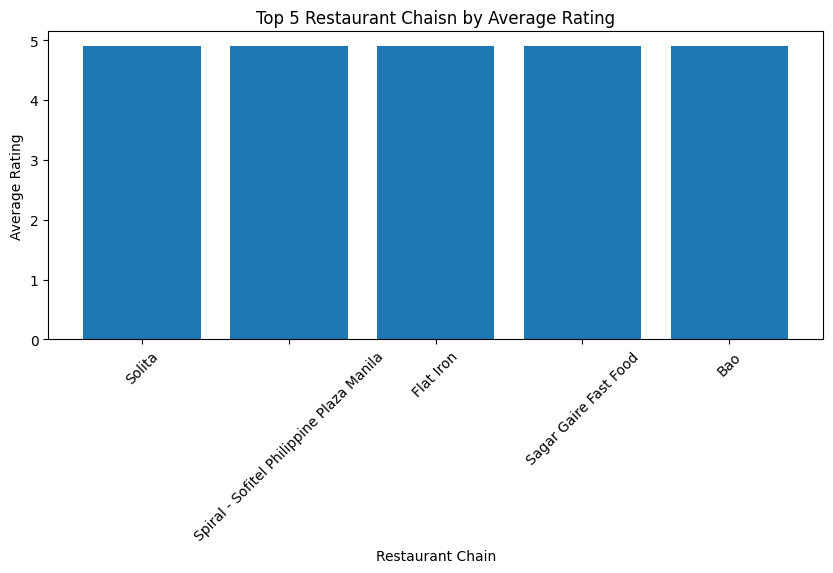

In [116]:
plt.figure(figsize=(10,4))
plt.bar(rating["Restaurant Name"][:5], rating["Average Rating"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.title("Top 5 Restaurant Chaisn by Average Rating")
plt.xticks(rotation=45)  
plt.show()

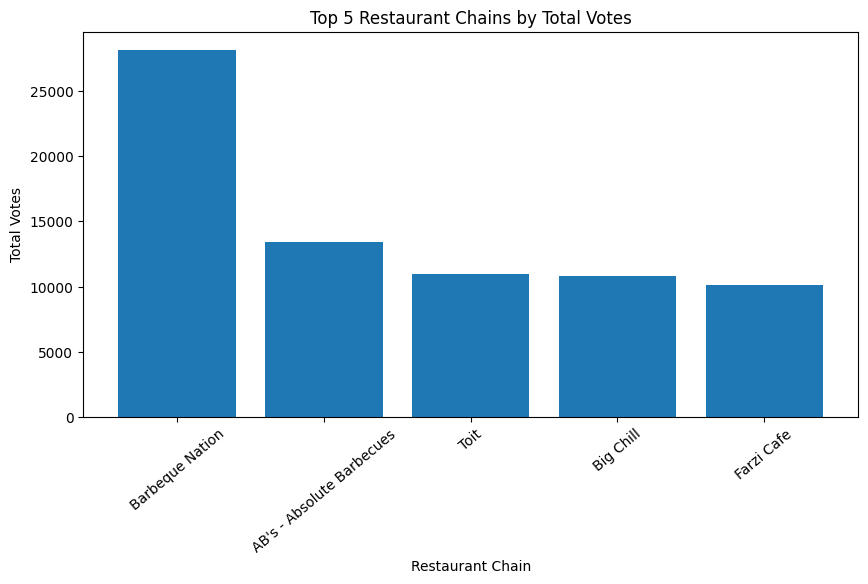

In [119]:
plt.figure(figsize=(10,5))
plt.bar(votes["Restaurant Name"][:5], votes["Total Votes"][:5])
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Total Votes")
plt.xticks(rotation=40)
plt.show()

# Restaurant Reviews
#### Analyze the text reviews to identify the most common positive and negative keywords.

In [46]:
df['Rating text']

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [51]:
positive_data = df.loc[df['Aggregate rating'] >=2.5]
positive_data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [52]:
positive_keywords = positive_data['Rating text'].unique()
positive_keywords

array(['Excellent', 'Very Good', 'Good', 'Average'], dtype=object)

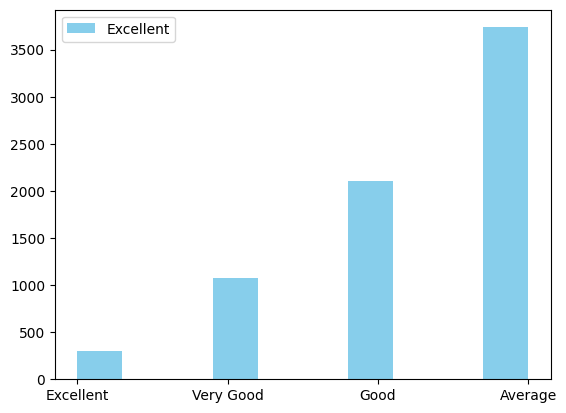

In [61]:
plt.hist(positive_data['Rating text'], label=positive_keywords, color='skyblue')
plt.legend()
plt.show()

In [64]:
negative_data = df.loc[(df['Aggregate rating'] <2.5) & (df['Aggregate rating'] > 0)]
negative_keywords = negative_data['Rating text'].unique()
negative_keywords

array(['Poor'], dtype=object)

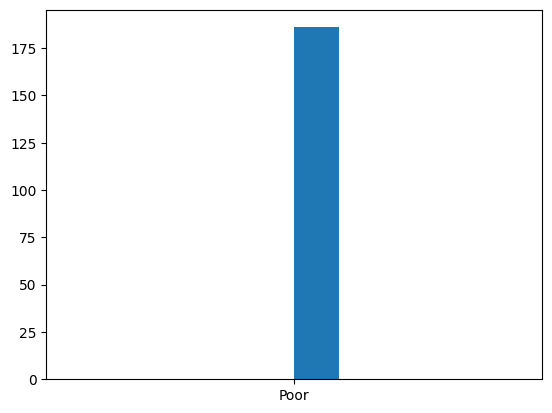

In [77]:
plt.hist(negative_data['Rating text'], label=negative_keywords)
plt.show()

# Votes Analysis
#### Identify the restaurants with the highest and lowest number of votes

In [68]:
Highest_voted_restaurant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
Highest_voted_restaurant = Highest_voted_restaurant.idxmax()
print("The Highest Voted Restuant is : ",Highest_voted_restaurant)

The Highest Voted Restuant is :  Barbeque Nation


In [80]:
lowest_rated_resturant = df.groupby('Restaurant Name')['Votes'].sum().sort_values()
lowest_rated_resturant = lowest_rated_resturant.idxmin()
print("The lowest Voted Restuant is : ",lowest_rated_restaurant)

The lowest Voted Restuant is :  Breaky2Dinner


#### Analyze if there is a correlation between the number of votes and the rating of a restaurant

In [81]:
corelation=np.corrcoef(df['Votes'],df['Aggregate rating'])
corelation=np.round(corelation,2)
corelation

array([[1.  , 0.31],
       [0.31, 1.  ]])

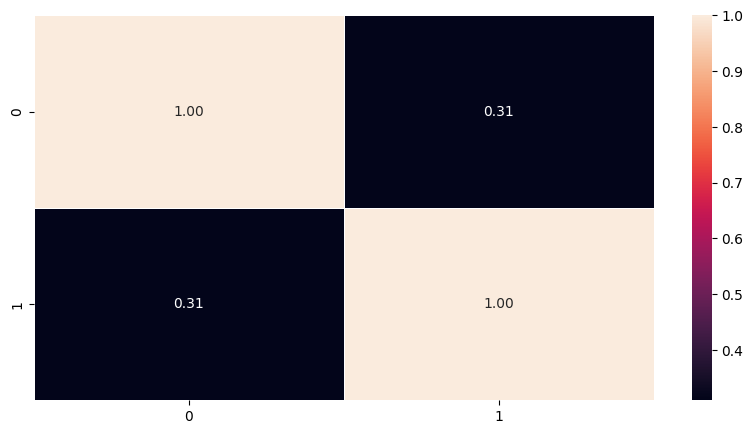

In [83]:
plt.figure(figsize=(10,5),dpi = 100)
sns.heatmap(corelation,annot=True,fmt=".2f",linewidth=.4)
plt.show()

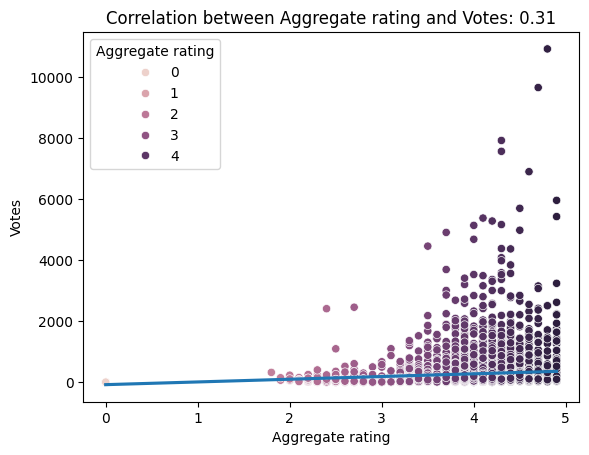

 As per result corelation value = 0.31, which indicates there is a moderate positive corelation between these two variabled.


In [91]:
sns.scatterplot(data=df, y = 'Votes' , hue = 'Aggregate rating', x = 'Aggregate rating')
sns.regplot(data=df, x= 'Aggregate rating' , y = 'Votes', scatter=False)
plt.title(f"Correlation between Aggregate rating and Votes: 0.31")
plt.show()
print(" As per result corelation value = 0.31, which indicates there is a moderate positive corelation between these two variabled.")

 # Price Range vs. Online Delivery and Table Booking
 #### Analyze if there is a relationship between the price range and the availability  of online delivery and table booking

 To analyzed this we need to plot 2 charts together

In [93]:
x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']

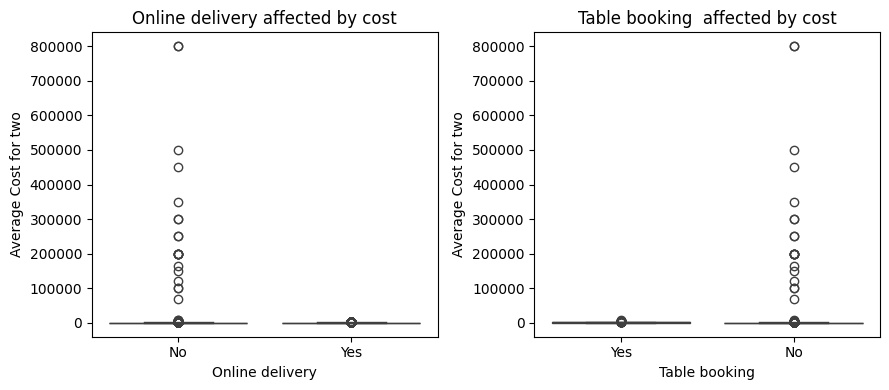

In [95]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking  affected by cost')
plt.tight_layout()
plt.show()

####  Determine if higher-priced restaurants are more likely to offer these services.

In [96]:
print("High priced Restaurants which have average cost more than 10,000 did not provide Online delivery as well as table Booking facilities. ")

High priced Restaurants which have average cost more than 10,000 did not provide Online delivery as well as table Booking facilities. 


let's check for the resturents have avg cost less than 10,000

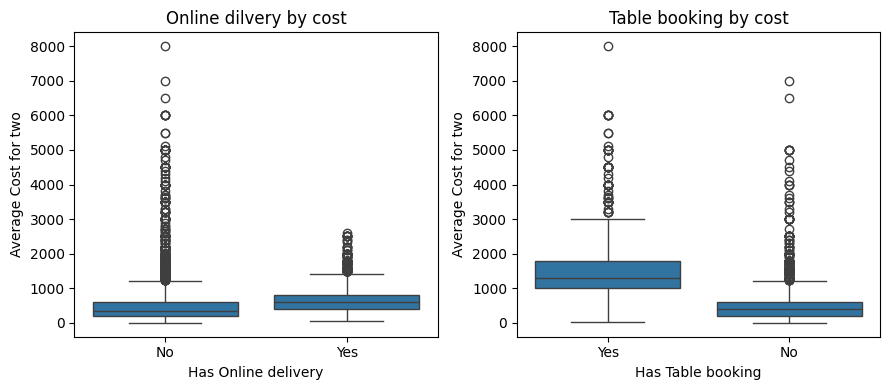

In [100]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title('Online dilvery by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title('Table booking by cost')
plt.tight_layout()
plt.show()

In [101]:
print(" The Online delivery facility is present for only those resturent, where the avg cost is less than 1000. ")
print(" The booking facility is availabel in restaurants with an average cost rating from 1000 to 2000. ")

 The Online delivery facility is present for only those resturent, where the avg cost is less than 1000. 
 The booking facility is availabel in restaurants with an average cost rating from 1000 to 2000. 
